In [1]:
library(ggplot2)

# Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.

Assume the following priors:
* a uniform distribution
* a Jeffrey’s prior
* a step function:

In [2]:
y = 7 #successes
n = 20 #trials

n_samples = 200
p = seq(0,1,length.out = n_samples)

Uniform and Jeffrey's priors are special cases of the **beta** distribution

In [3]:
#From theory it is known that - if a binomial distribution is assumed as likelihood - the posterior becomes:
posterior_beta = function(a=1,b=1,prior="uniform"){
    
    if (prior == "uniform"){
        a=1
        b=1
    }
    else if (prior == "jeffrey"){
        a = .5
        b = .5
    }
    
    #likelihood is assumed to be the binomial distribution 
    #from theory we know:
    posterior = dbeta(p, a + y, b + n - y)
    
   
    mean = (a + y) / (a + b + n)
    mode = (a + y - 1) / (a + b + n - 2)
    
    #gaussian approximation
    std = sqrt((a + y - 1 )*(n + b - y - 1)/ (n + a + b - 2 )) / (n + a + b -2)

    
    return(list(posterior = posterior, mean = mean, mode = mode, std = std))
    }

In [4]:
#step function
#not normalized
g. = function(x){
    ifelse(x <=.2,x,
          ifelse(.2 < x & x <= .3, .2,
                ifelse(.3 < x & x <= .5, .5 - x, 0)))
    }

#normalized step function
g = function(x){
    return(g.(x) / integrate(g.,0,1)$value)
    }

In [5]:
#computing the posterior for the step function
#likelihood = dbinom(x = y, size = n, prob = p) 

#not normalized
post_step. = dbinom(x = y, size = n, prob = p) * g(p)

#normalized
post_step  = post_step. / sum(post_step. * 1/n_samples)

In [6]:
#computing the moments

#posterior_beta function gives me everything

mean_uniform = posterior_beta()$mean
mean_jeffrey = posterior_beta(prior="jeffrey")$mean

#assuming that gaussian approximation holds
std_uniform = posterior_beta()$std
std_jeffrey =  posterior_beta(prior="jeffrey")$std

#moments for the step function
mean_step = sum(p * post_step * 1/n_samples)
std_step  = sum(p**2 * post_step * 1/n_samples)

Dashed lines represent the mean of each distribution

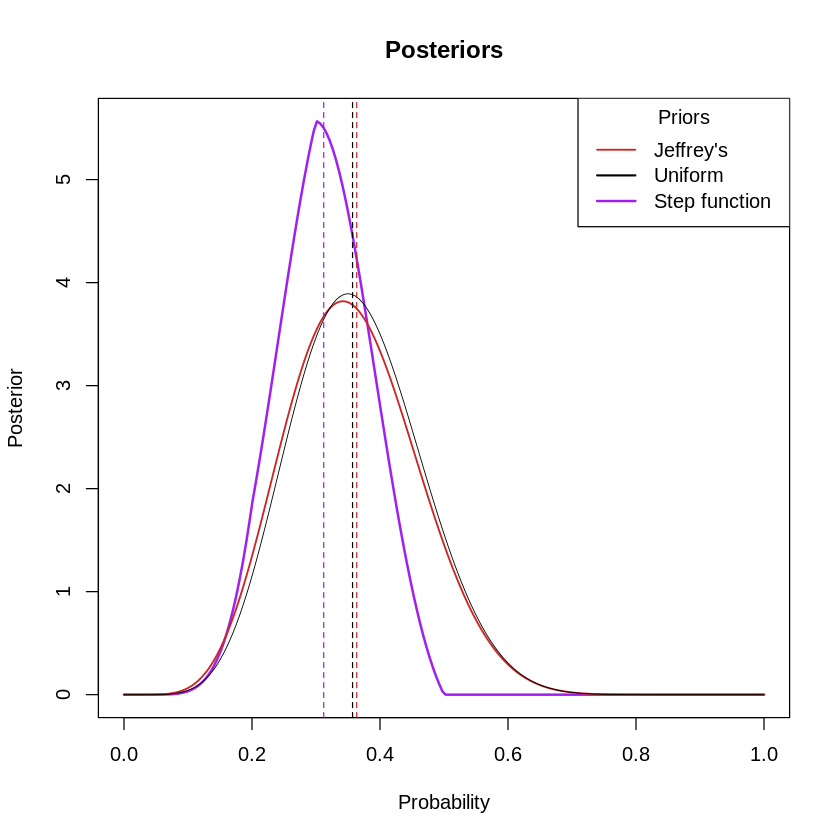

In [7]:
#plots

#normalizing posteriors in order to plot them
posterior_jeffrey = posterior_beta(prior="jeffrey")$posterior / sum(posterior_beta(prior="jeffrey")$posterior / n_samples)
posterior_uniform = posterior_beta(prior="uniform")$posterior / sum(posterior_beta(prior="uniform")$posterior / n_samples)


plot(p,post_step,type = "l",lwd=2,col="purple",main="Posteriors",xlab="Probability",ylab = "Posterior")
lines(p,posterior_jeffrey,type = "l",lwd=1.5,col="firebrick3",)
lines(p,posterior_uniform,type = "l",lwd=.7,col="black")

legend("topright", 
       title="Priors",
       legend=c("Jeffrey's","Uniform", "Step function"), 
       col=c("firebrick3", "black", "purple"), 
       lwd=c(1.5, 1.7, 2),
       bty="o")
abline(v = mean_uniform,col="firebrick3",lty="dashed")
abline(v = mean_jeffrey,col="black",lty="dashed")
abline(v = mean_step,col="purple",lty="dashed")

cat("Dashed lines represent the mean of each distribution" )

In [8]:
#summarize the results
mean_vec  = c(mean_uniform, mean_jeffrey, mean_step)
std_vec   = c(std_uniform, std_jeffrey, std_step)
prior_vec =  c("Uniform", "Jeffrey's", "Step function")

results_df = data.frame(Prior = prior_vec, 
                         Mean = round(mean_vec, 3),
                         Std = round(std_vec, 3))

results_df


Prior,Mean,Std
<chr>,<dbl>,<dbl>
Uniform,0.364,0.107
Jeffrey's,0.357,0.109
Step function,0.312,0.102


## Compute a 95% credibility interval and give the results in a summary table

In [9]:
low_unif  = mean_uniform - 2*std_uniform
high_unif = mean_uniform + 2*std_uniform

low_jeffrey  = mean_jeffrey - 2*std_jeffrey
high_jeffrey = mean_jeffrey + 2*std_jeffrey

low_step  = mean_step - 2*std_step
high_step = mean_step + 2*std_step

In [10]:
mean_vec  = c(mean_uniform, mean_jeffrey, mean_step)
std_vec   = c(std_uniform, std_jeffrey, std_step)
low_vec   = c(mean_uniform - low_unif, mean_jeffrey - low_jeffrey, mean_step - low_step)
high_vec  = c(mean_uniform + high_unif, mean_jeffrey + high_jeffrey, mean_step + high_step)


summary_table = data.frame(
  Prior = c("Uniform", "Jeffrey's", "Step function"),
  Mean = round(mean_vec, 3),
  Std = round(std_vec,3),
  "Low 95 CrInt" = round(low_vec,3),
  "Up 95 CrInt" = round(high_vec,3)
)

summary_table


Prior,Mean,Std,Low.95.CrInt,Up.95.CrInt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Uniform,0.364,0.107,0.213,0.941
Jeffrey's,0.357,0.109,0.218,0.932
Step function,0.312,0.102,0.205,0.829


## Draw the limits on the plot of the posterior distribution

Dashed lines represent the 95 percent credibility interval for each distribution

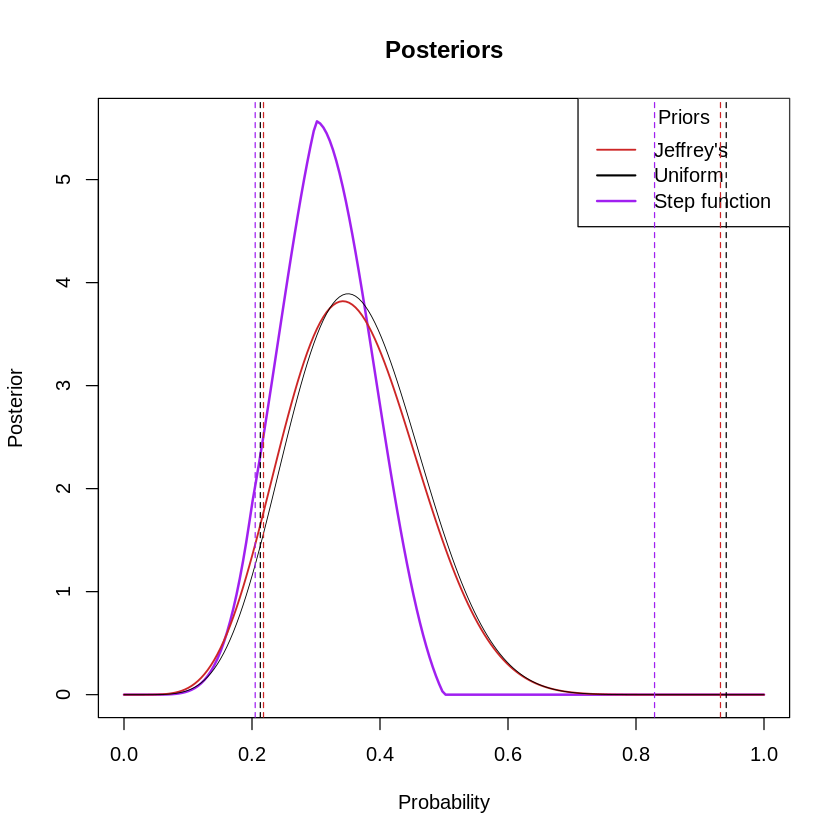

In [11]:
plot(p,post_step,type = "l",lwd=2,col="purple",main="Posteriors",xlab="Probability",ylab = "Posterior")
lines(p,posterior_jeffrey,type = "l",lwd=1.5,col="firebrick3",)
lines(p,posterior_uniform,type = "l",lwd=.7,col="black")

legend("topright", 
       title="Priors",
       legend=c("Jeffrey's","Uniform", "Step function"), 
       col=c("firebrick3", "black", "purple"), 
       lwd=c(1.5, 1.7, 2),
       bty="o")


#limits uniform
abline(v = summary_table[1,4],col="black",lty="dashed")
abline(v = summary_table[1,5],col="black",lty="dashed")


#limits jeffrey
abline(v = summary_table[2,4],col="firebrick3",lty="dashed")
abline(v = summary_table[2,5],col="firebrick3",lty="dashed")


#limits step
abline(v = summary_table[3,4],col="purple",lty="dashed")
abline(v = summary_table[3,5],col="purple",lty="dashed")

cat("Dashed lines represent the 95 percent credibility interval for each distribution" )

# Giardia cysts

## Assuming π as the probability that one-liter water sample contains Giardia cystis,find the posterior distribution for π

In [12]:
n = 116 #samples
y = 17 #contaminated samples

In [13]:
#Bernoulli process
n_samples = 200
p = seq(0,1,length.out = n_samples) #range of probabilities to be evaluated

In [14]:
#using the same function as point 1
#From theory it is known that - if a binomial distribution is assumed as likelihood - the posterior becomes:
posterior_beta = function(a=1,b=1,prior="uniform"){
    
    if (prior == "uniform"){
        a=1
        b=1
    }
    else if (prior == "jeffrey"){
        a = .5
        b = .5
    }
    
    #likelihood is assumed to be the binomial distribution
    #posterior not normalized
    #posterior = p**(y + a - 1) * (1 - p )**(n - y + b - 1)
    
    #from theory we know:
    posterior = dbeta(p, a + y, b + n - y)
    
   
    mean = (a + y) / (a + b + n)
    mode = (a + y - 1) / (a + b + n - 2)
    
    #gaussian approximation
    std = sqrt((a + y - 1 )*(n + b - y - 1)/ (n + a + b - 2 )) / (n + a + b -2)

    return(list(posterior = posterior, mean = mean, mode = mode, std = std))
    }

* Assuming a uniform prior distribution

In [15]:
posterior_uniform = posterior_beta("uniform")$posterior / sum(posterior_beta("uniform")$posterior / n_samples)

* Assuming a Beta(1,4) prior

In [16]:
posterior_beta14 = posterior_beta(a=1,b=4,prior="")$posterior / sum(posterior_beta(a=1,b=4,prior="")$posterior / n_samples)

##  Plot the posterior distribution and summarize the results computing the first two moments

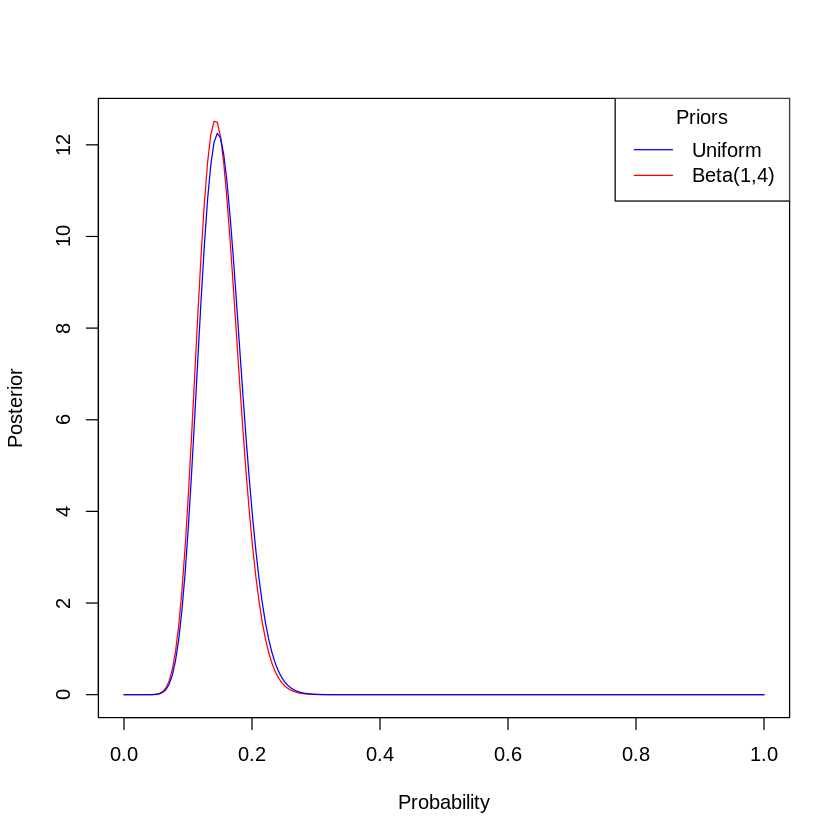

In [17]:
plot(p,posterior_beta14,type="l",col="red",xlab="Probability",ylab="Posterior")
lines(p,posterior_uniform,type="l",col="blue")


legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(1,4)"), 
       col=c("blue", "red"), 
       lwd=c(1, 1),
       bty="o")

In [18]:
#posterior_beta function to compute moments

mean_uniform = posterior_beta()$mean
mean_beta14  = posterior_beta(a=1,b=4,prior="")$mean

std_uniform = posterior_beta()$std
std_beta14  = posterior_beta(a=1,b=4,prior="")$std


#computing variance with definition
var_uniform = sum(p**2 * posterior_uniform /n_samples)
var_beta14  = sum(p**2 * posterior_beta14 / n_samples)

In [19]:
mean_vec     = c(mean_uniform,mean_beta14)
variance_vec = c(var_uniform,var_beta14)
std_vec      = c(std_uniform,std_beta14)

summary_table = data.frame(
    Prior = c("Uniform", "Beta(1,4)"),
    Mean  = round(mean_vec, 3),
    Var   = round(variance_vec,3),
    Std   = round(std_vec,3)
)

summary_table

Prior,Mean,Var,Std
<chr>,<dbl>,<dbl>,<dbl>
Uniform,0.153,0.024,0.033
"Beta(1,4)",0.149,0.023,0.032


## Find a normal approximation for the posterior g (π | y)

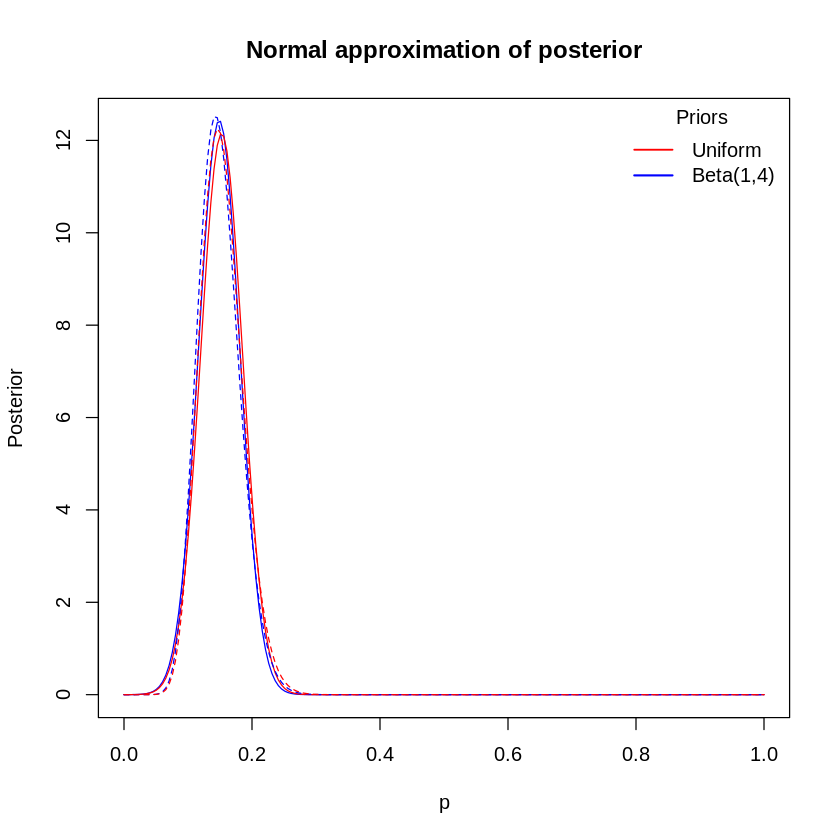

In [20]:
post_gauss_unif = dnorm(p,mean_uniform,std_uniform)
post_gauss_beta =  dnorm(p,mean_beta14,std_beta14)

plot(p,post_gauss_beta,lty=1,type="l",col="blue",ylab = "Posterior",main="Normal approximation of posterior")
lines(p,post_gauss_unif,lty=1,col="red")

lines(p,posterior_beta14,type="l",col="blue",lty="dashed")
lines(p,posterior_uniform,type="l",col="red",lty="dashed")


legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(1,4)"), 
       col=c("red", "blue"), 
       lwd=c(1.5, 1.7),
       lty=c(1,1),
       bty="n")


## Compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table

In [21]:
#credibility interval for original posterior
low_unif_og  = mean_uniform - 2*var_uniform
high_unif_og = mean_uniform + 2*var_uniform

low_beta14_og   = mean_beta14 - 2*var_beta14
high_beta14_og  = mean_beta14 + 2*var_beta14


#credibility interval for normal approximation
low_unif_approx  = mean_uniform - 2*std_uniform
high_unif_approx = mean_uniform + 2*std_uniform

low_beta14_approx  = mean_beta14 - 2*std_beta14
high_beta14_approx = mean_beta14 + 2*std_beta14


low_vec_og  = c(low_unif_og, low_beta14_og)
high_vec_og = c(high_unif_og,high_beta14_og)

low_vec_approx  = c(low_unif_approx,low_beta14_approx)
high_vec_approx = c(high_unif_approx,high_beta14_approx)


#giving the results in a summary table
summary_table$low_bound_og      = c(low_unif_og, low_beta14_og)
summary_table$high_bound_og     = c(high_unif_og, high_beta14_og)
summary_table$low_bound_approx  = c(low_unif_approx, low_beta14_approx)
summary_table$high_bound_approx = c(high_unif_approx, high_beta14_approx)
summary_table

Prior,Mean,Var,Std,low_bound_og,high_bound_og,low_bound_approx,high_bound_approx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Uniform,0.153,0.024,0.033,0.1038314,0.2012534,0.08686964,0.2182151
"Beta(1,4)",0.149,0.023,0.032,0.1024251,0.1950955,0.08460480,0.2129159


## Add the limits on the plot of the posterior distributions

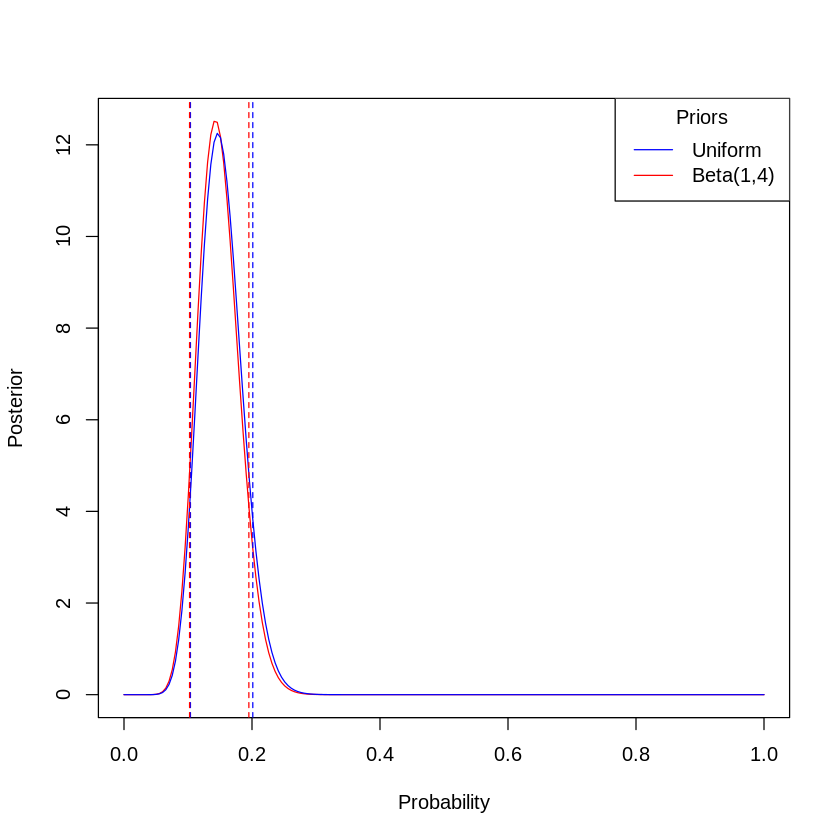

In [22]:
plot(p,posterior_beta14,type="l",col="red",xlab="Probability",ylab="Posterior")
lines(p,posterior_uniform,type="l",col="blue")


legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(1,4)"), 
       col=c("blue", "red"), 
       lwd=c(1, 1),
       bty="o")


##original
#uniform
abline(v=summary_table[1,5],col="blue",lty="dashed")
abline(v=summary_table[1,6],col="blue",lty="dashed")

#beta
abline(v=summary_table[2,5],col="red",lty="dashed")
abline(v=summary_table[2,6],col="red",lty="dashed")

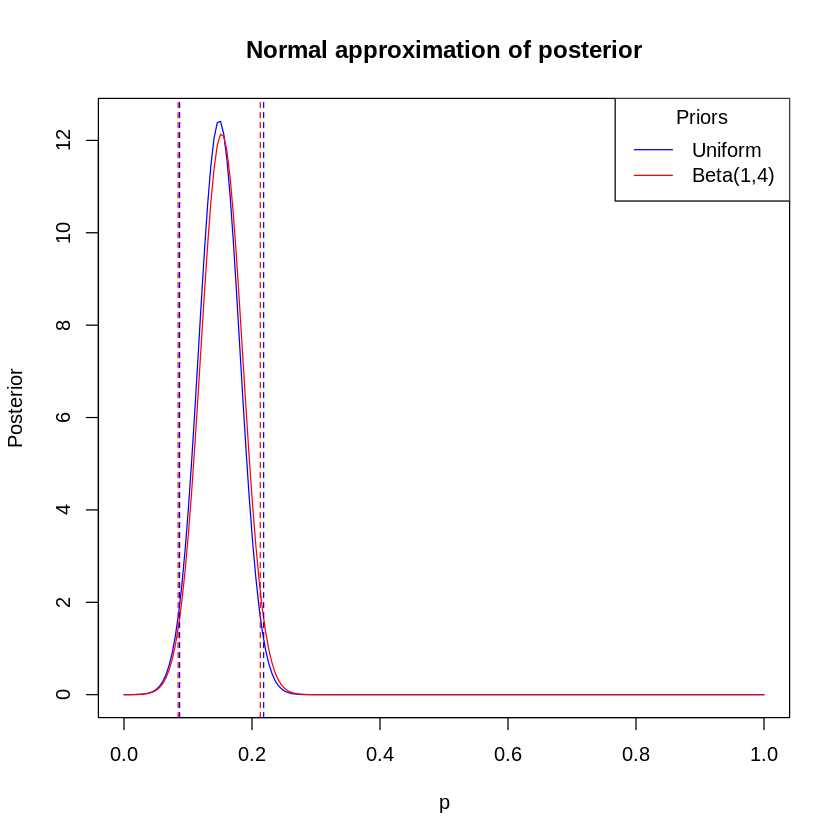

In [23]:
plot(p,post_gauss_beta,lty=1,type="l",col="blue",ylab = "Posterior",main="Normal approximation of posterior")
lines(p,post_gauss_unif,lty=1,col="red")

#approximation
#uniform
abline(v=summary_table[1,7],col="blue",lty="dashed")
abline(v=summary_table[1,8],col="blue",lty="dashed")

#beta
abline(v=summary_table[2,7],col="red",lty="dashed")
abline(v=summary_table[2,8],col="red",lty="dashed")


legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(1,4)"), 
       col=c("blue", "red"), 
       lwd=c(1, 1),
       bty="o")


# Coin flipping

In [24]:
n = 30 #coin is flipped 30 times
#defining Tail = 1 and Head = 0 so that I can easily count the output
T = 1
H = 0
outcome =c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)

cat("Number of Tails:",sum(outcome),"\n")
cat("Number of Heads:",n-sum(outcome))

Number of Tails: 15 
Number of Heads: 15

## Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [25]:
#binomial distribution
p = seq(0,1,length.out = 200)
y = sum(outcome)
likelihood = dbinom(y,n,p)

In [26]:
#From theory it is known that - if a binomial distribution is assumed as likelihood - the posterior becomes:
posterior_beta = function(a=1,b=1,prior="uniform"){
    
    if (prior == "uniform"){
        a=1
        b=1
    }
    else if (prior == "jeffrey"){
        a = .5
        b = .5
    }
    
    #likelihood is assumed to be the binomial distribution
    #posterior not normalized
    #posterior = p**(y + a - 1) * (1 - p )**(n - y + b - 1)
    
    #from theory we know:
    posterior = dbeta(p, a + y, b + n - y)
    
   
    mean = (a + y) / (a + b + n)
    mode = (a + y - 1) / (a + b + n - 2)
    
    #gaussian approximation
    std = sqrt((a + y - 1 )*(n + b - y - 1)/ (n + a + b - 2 )) / (n + a + b -2)
    
    return(list(posterior = posterior, mean = mean, mode = mode, std = std))
    }

In [27]:
#uniform prior
post_unif = posterior_beta()$posterior

#beta prior
#choosing random numbers for the parameters
alpha = 2
beta  = 5

post_beta = posterior_beta(a=alpha,b=beta,prior="")$posterior

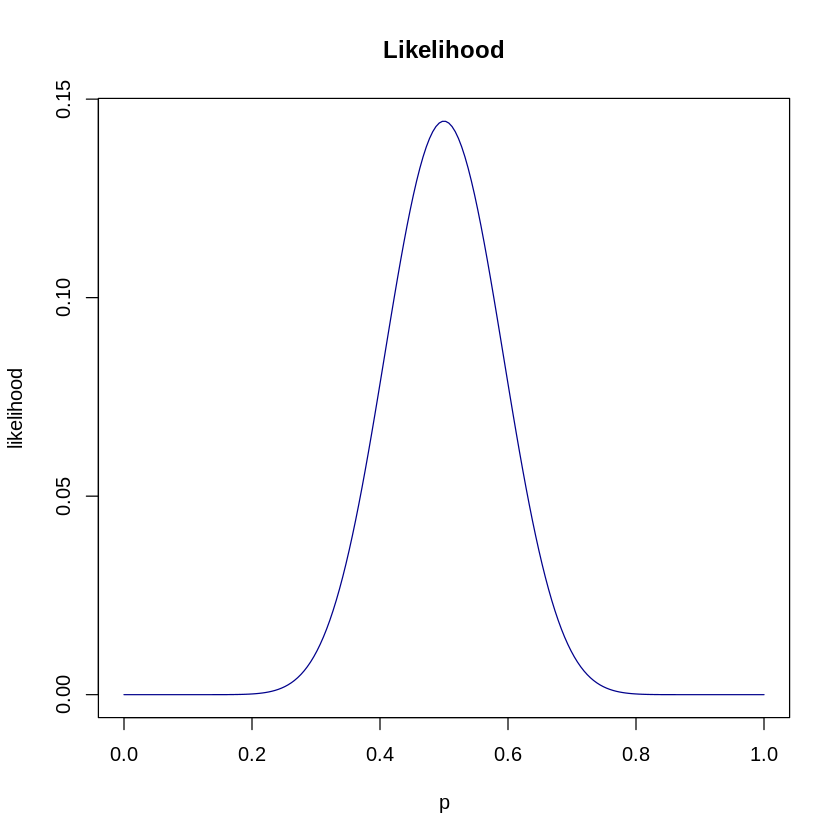

In [28]:
plot(p,likelihood,type="l",col="darkblue",main = "Likelihood")

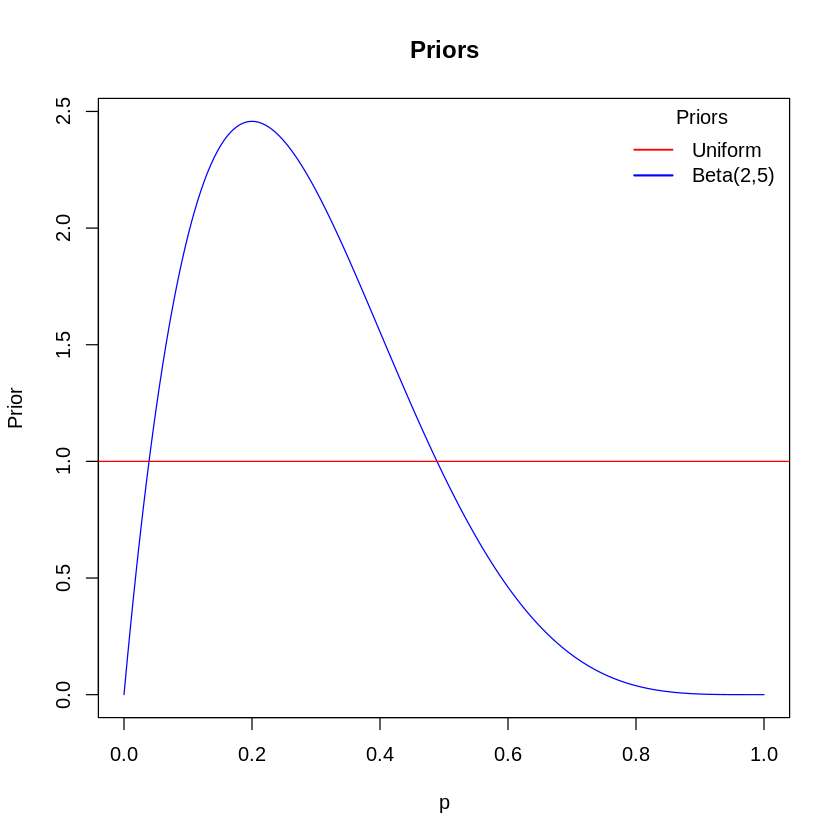

In [29]:
#plotting the prior
plot(p,dbeta(p, alpha, beta),type="l",col="blue",main="Priors",ylab = "Prior")
abline(h=1,col="red") #prior has a constant value for each p
legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(2,5)"), 
       col=c("red", "blue"), 
       lwd=c(1.5, 1.7),
       lty=c(1,1),
       bty="n")

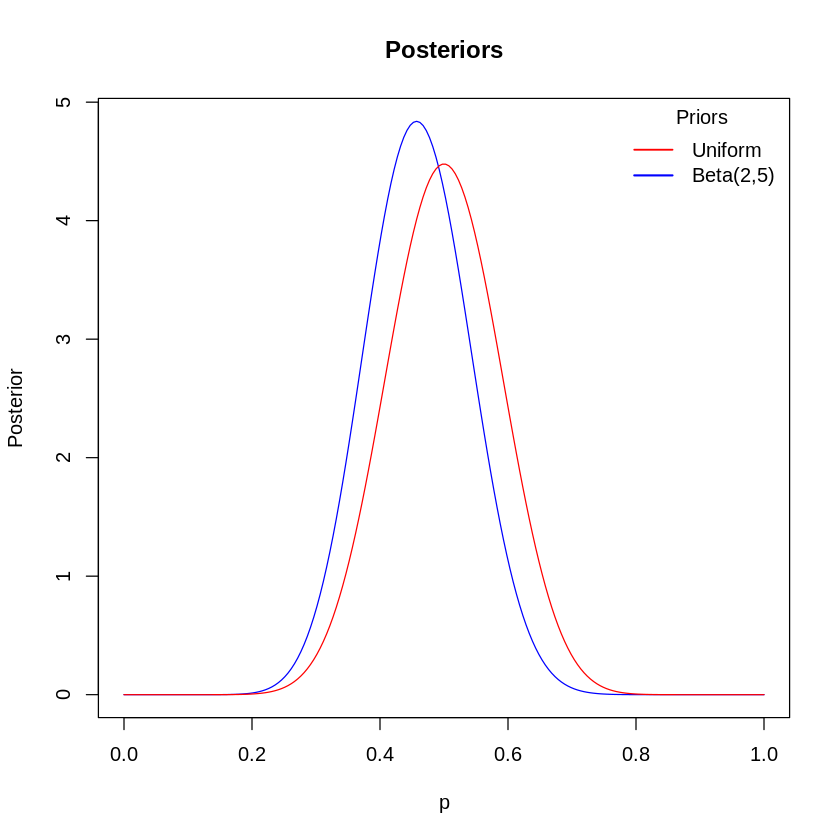

In [30]:
#plotting the posterior
plot(p,post_beta,type="l",col="blue",main="Posteriors",ylab = "Posterior")
lines(p,post_unif,type="l",col="red")

legend("topright", 
       title="Priors",
       legend=c("Uniform", "Beta(2,5)"), 
       col=c("red", "blue"), 
       lwd=c(1.5, 1.7),
       lty=c(1,1),
       bty="n")

## Evaluate the most probable value for the coin probability *p*,integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

The most probable value is given by the mode for each posterior

In [31]:
#for uniform prior the mode is at y/n
mode_unif = posterior_beta()$mode

#beta prior
mode_beta = posterior_beta(a=alpha,b=beta,prior = "")$mode

In [32]:
cat("The most porbable value assuming a uniform prior is:",round(mode_unif,2),"\n")
cat("The most porbable value assuming a beta prior is:",round(mode_beta,2),"\n")


The most porbable value assuming a uniform prior is: 0.5 
The most porbable value assuming a beta prior is: 0.46 


In [33]:
#estimating 95% credibility interval
#posterior is just: posterior = dbeta(p, a + y, b + n - y)

#so the integral is given by pbeta()
#Actually I'm interested in the inverse of this, i.e. the quantile function compute at 2.5% and 97.5%
lower_ = qbeta(.025,alpha + y ,beta + n -y)
upper_ = qbeta(.975,alpha + y,beta + n - y)

cat("95% credibility interval is: [",round(lower_,2),",",round(upper_,2),"]")

95% credibility interval is: [ 0.3 , 0.62 ]

## Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [34]:
outcome

[1] 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0

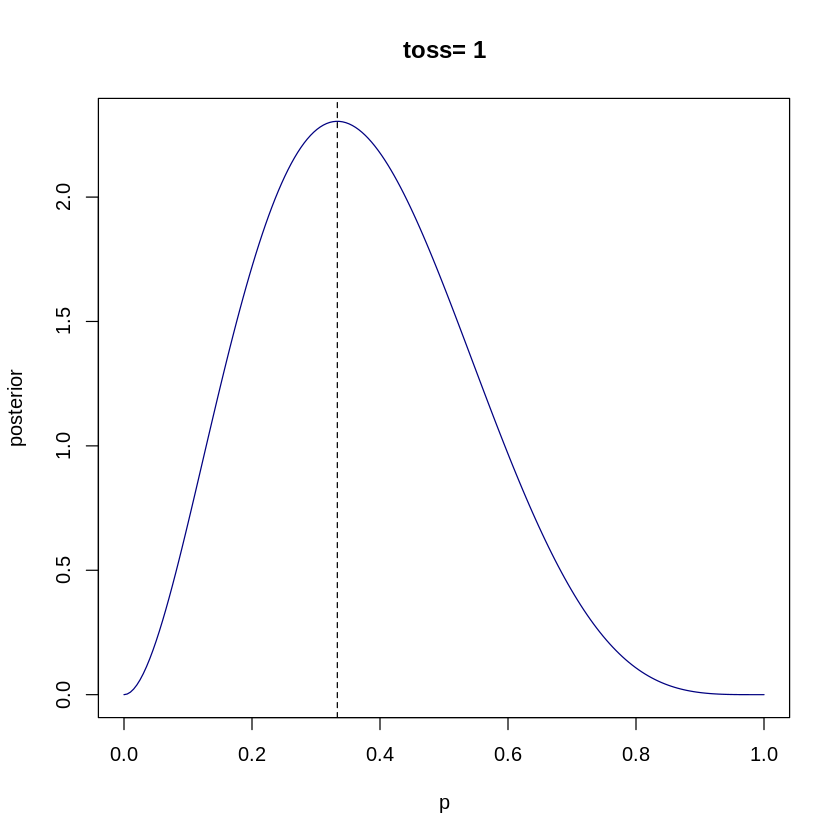

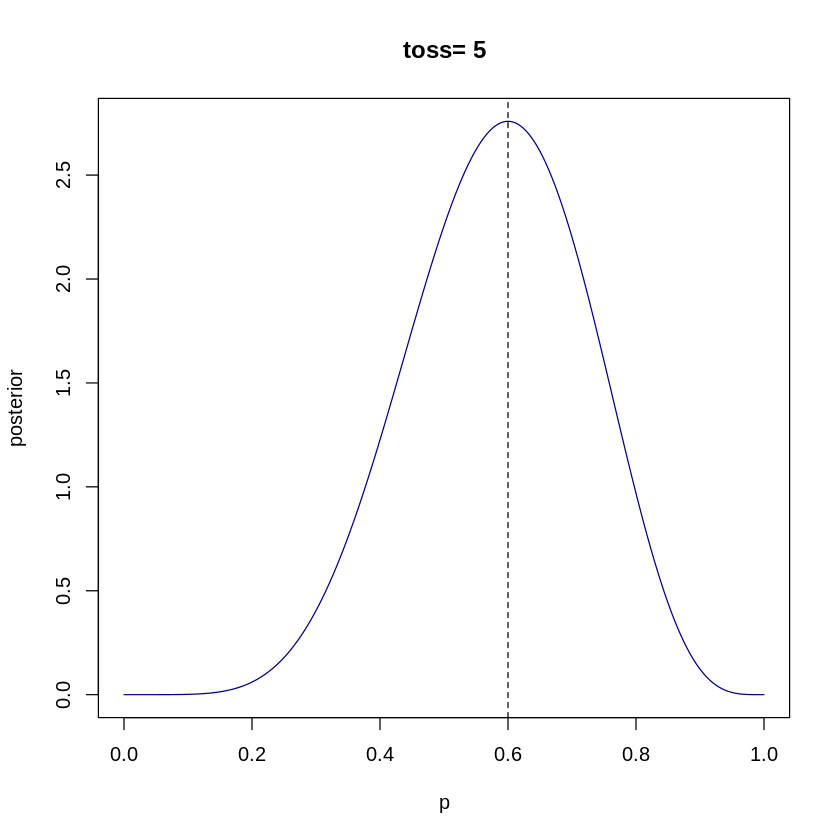

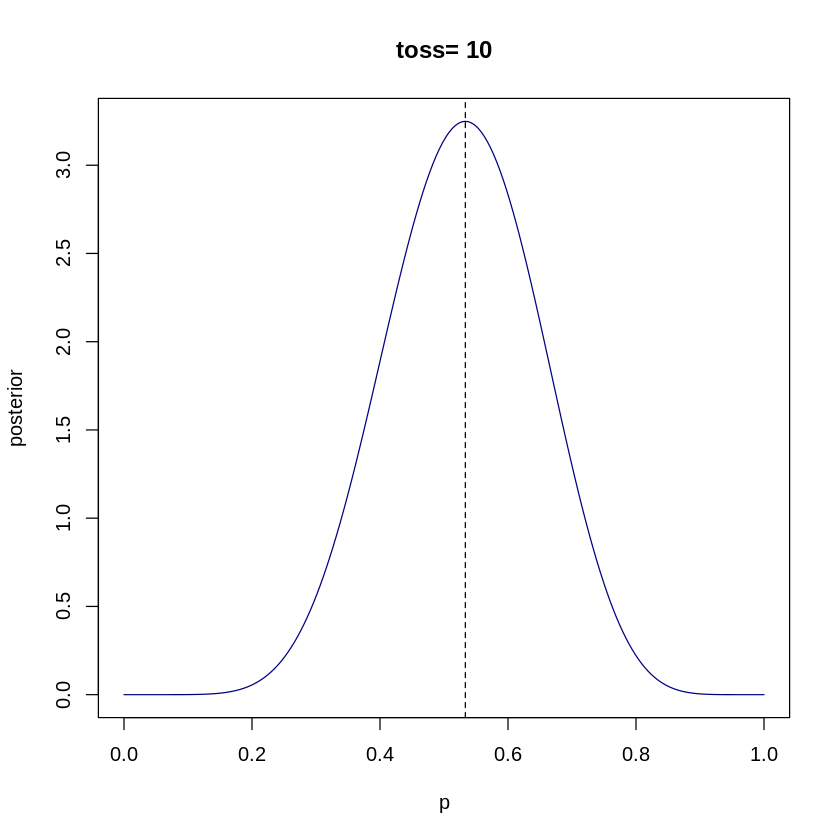

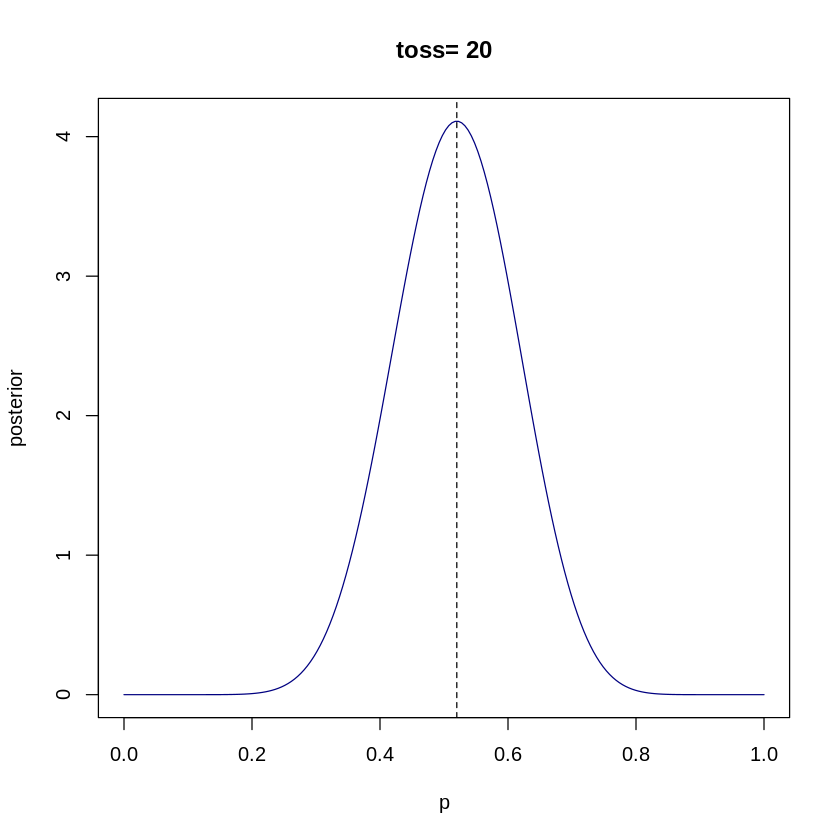

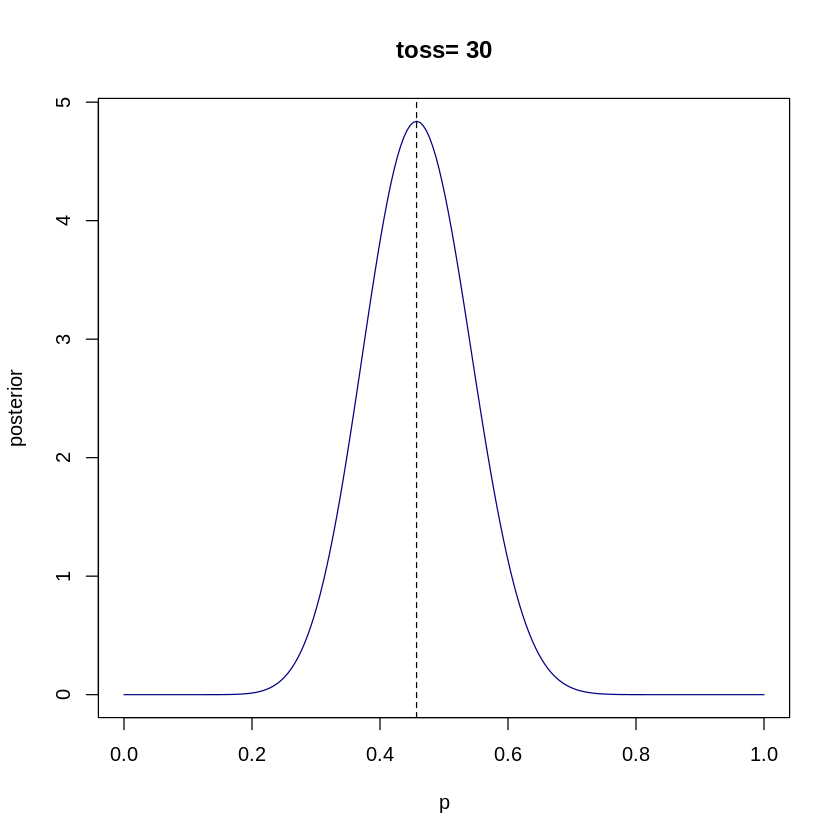

In [35]:
#empty dataframe where I'll store the information
credibility_table = data.frame(toss = integer(), mode = numeric(), lower = numeric(), upper = numeric())

for (toss in 1:30){
    
    n = toss
    #counting how many successes has been so far
    y = sum(outcome[1:toss])
    
    posterior = dbeta(p, alpha + y, beta + n - y) 
    
    #most probable value
    mode = (alpha + y - 1) / (alpha + beta + n - 2)
    
    #credibility interval
    
    lower = qbeta(.025,alpha + y ,beta + n -y)
    upper = qbeta(.975,alpha + y,beta + n - y)

    #store the results in the data frame
    credibility_table = rbind(credibility_table, data.frame(toss = toss, mode = mode, lower = lower, upper = upper))
    
    
    #plotting only some of them
    if(toss %in% c(1,5,10,20,30)){
        plot(p,posterior,type="l",col="navy",main=paste("toss=",toss))
        abline(v=mode,lty=2)
        }

}

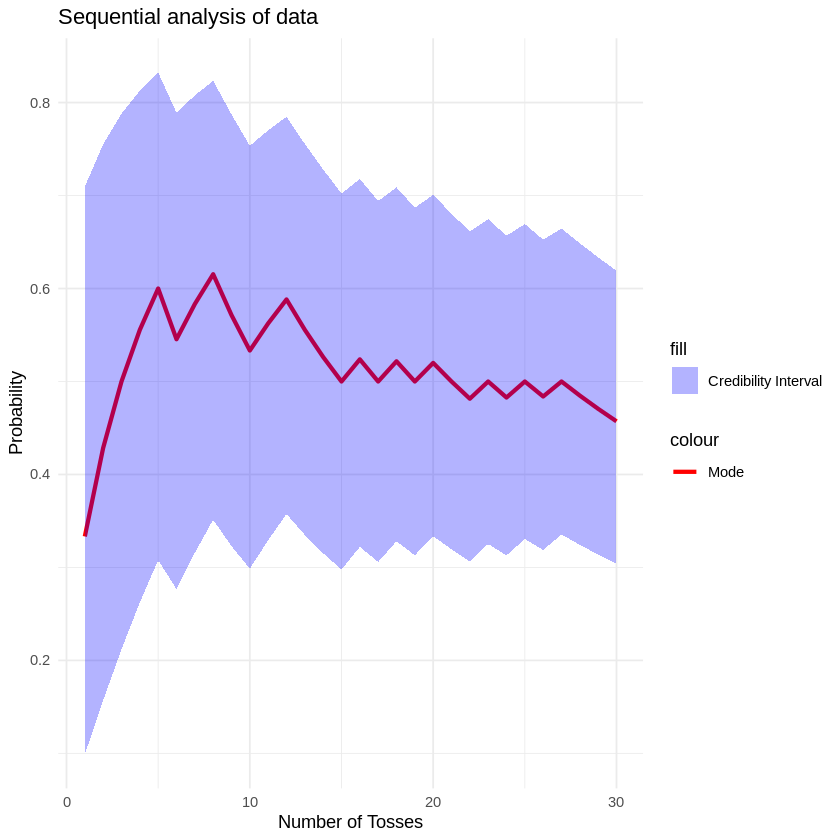

In [36]:
ggplot(credibility_table, aes(x = toss)) + 
  geom_line(aes(y = mode, color = "Mode"), linewidth = 1.2) +
  geom_ribbon(aes(ymin = lower, ymax = upper, fill = "Credibility Interval"), alpha = 0.3) +
  scale_color_manual(values = c("Mode" = "red")) +
  scale_fill_manual(values = c("Credibility Interval" = "blue")) +
  ggtitle("Sequential analysis of data") +
  xlab("Number of Tosses") +
  ylab("Probability") +
  theme_minimal() +
  theme(legend.position = "right")


## Do you get a different result,by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?


In [37]:
round(credibility_table[nrow(credibility_table), ],2)

,toss,mode,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>
30,30,0.46,0.3,0.62


In [38]:
cat("Most probable value with one-step analysis:",round(mode_beta,2))
cat("\n")
cat("95% credibility interval one-step analysis: [",round(lower_,2),",",round(upper_,2),"]")

Most probable value with one-step analysis: 0.46
95% credibility interval one-step analysis: [ 0.3 , 0.62 ]

I can not see any difference between the two approaches

# Six Boxes Toy Model

In [39]:
set.seed(420)
boxes = list(
  box0 = c(rep("black", 5)),
  box1 = c(rep("black", 4), rep("white", 1)),
  box2 = c(rep("black", 3), rep("white", 2)),
  box3 = c(rep("black", 2), rep("white", 3)),
  box4 = c(rep("black", 1), rep("white", 4)),
  box5 = c(rep("white", 5))
)

selected_box = sample(boxes,1)

In [40]:
selected_box

$box4
[1] "black" "white" "white" "white" "white"

In [41]:
#experiment
n_extractions = 100

extracted_balls = sample(selected_box[[1]],n_extractions,replace=TRUE)
extracted_balls

[1] "white" "white" "black" "white" "white" "black" "black" "white" "white"
 [10] "white" "black" "black" "white" "black" "white" "white" "white" "white"
 [19] "white" "white" "black" "white" "white" "white" "white" "white" "white"
 [28] "white" "white" "white" "black" "white" "white" "white" "black" "white"
 [37] "white" "white" "white" "white" "white" "white" "white" "white" "white"
 [46] "white" "white" "white" "black" "white" "black" "white" "white" "black"
 [55] "white" "white" "white" "white" "black" "white" "white" "white" "white"
 [64] "black" "white" "white" "white" "white" "white" "white" "black" "white"
 [73] "white" "white" "black" "white" "white" "white" "white" "white" "black"
 [82] "white" "white" "black" "black" "white" "white" "white" "white" "white"
 [91] "black" "white" "white" "white" "white" "white" "white" "white" "white"
[100] "white"

In [42]:
#initializing matrix of priors
#row is number of extraction, column is the box
#each entry is the prior related to sampling a white ball
#at the beginning I assume a flat prior, i.e. I have a probability of 1/6 of sampling a box wrt another
prior = data.frame(matrix(1/6, nrow = 1, ncol = 6))
colnames(prior) = c("box0", "box1", "box2", "box3", "box4", "box5")


for (drawn_ball in extracted_balls){
 
    posteriors = c()
   
    #compute quantities for each possible box
    for (possible_box in 0:5){

        
        if (drawn_ball == "white"){
            
            likelihood = possible_box / 5 #probability of drawing a white ball. Box_j has probability j/5, by construction
            posterior = likelihood * prior[nrow(prior),possible_box+1] #nrow() takes the last row of the matrix
     
            }
            
        else{
       
            likelihood = 1 - (possible_box / 5)
   
            posterior = likelihood * prior[nrow(prior),possible_box+1]}
        
        #update prior
        posteriors = c(posteriors, posterior)
        

    }
    posteriors = posteriors/sum(posteriors)
    prior = rbind(prior,posteriors)
    
    }
posterior_matrix = prior

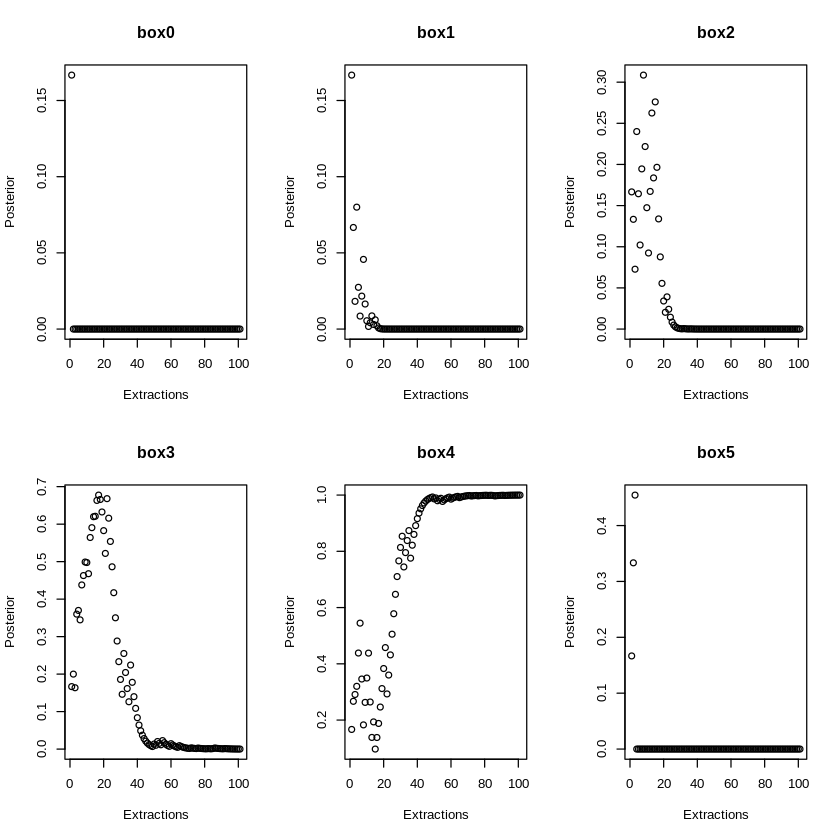

In [43]:
#one figure multiple axes
par(mfrow = c(2, 3))

#plot
for (i in 1:ncol(posterior_matrix)) {
  plot(posterior_matrix[, i], main = colnames(posterior_matrix)[i], xlab = "Extractions", ylab = "Posterior")
}